## 简单线性回归程序
接下来，我们以鸢尾花数据集中，花瓣长度与花瓣宽度为例，通过程序来实现简单线性回归。

In [4]:
import numpy as np
# 用于线性回归的类
from sklearn.linear_model import LinearRegression
# 用于切分训练集与测试集
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
# 设置输出的精度。默认为8
np.set_printoptions(precision=2)

iris = load_iris()
# 获取花瓣长度作为x，花瓣宽度作为y
X,y = iris.data[:,2].reshape(-1,1),iris.data[:,3]

lr = LinearRegression()
# 将数据集划分为训练集与测试集
# test_size：测试集大小。
# random_state：随机种子，可用来产生相同的随机数序列。
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# 使用训练集数据，训练模型
lr.fit(X_train,y_train)
print("权重：",lr.coef_)
print("截距：",lr.intercept_)
# 从训练集学习到了模型的参数（w与b)，确定方程，就可以进行预测
y_hat = lr.predict(X_test)
print("实际值：",y_test[:5])
print("预测值：",y_hat[:5])

权重： [0.42]
截距： -0.3705841202176683
实际值： [2.4 1.  0.2 1.8 0.2]
预测值： [1.77 1.31 0.22 2.27 0.26]


Text(0, 0.5, '花瓣宽度')

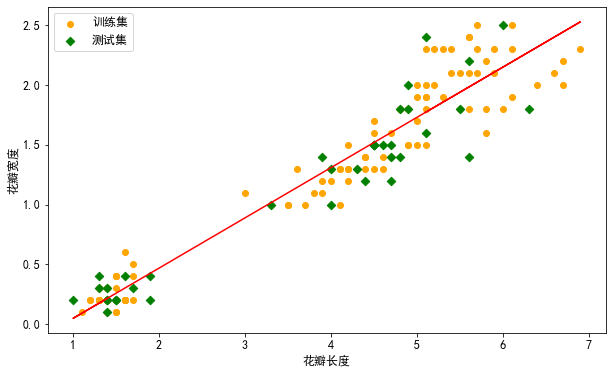

In [17]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False 
plt.rcParams["font.size"] = 12

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c="orange", label="训练集") 
plt.scatter(X_test, y_test, c="g", marker="D", label="测试集") 
plt.plot(X, lr.predict(X), "r-")
plt.legend() 
plt.xlabel("花瓣长度")
plt.ylabel("花瓣宽度")

## 多元线性回归程序
类似的，我们也可以实现多元线性回归。我们以波士顿房价为例来进行演示。
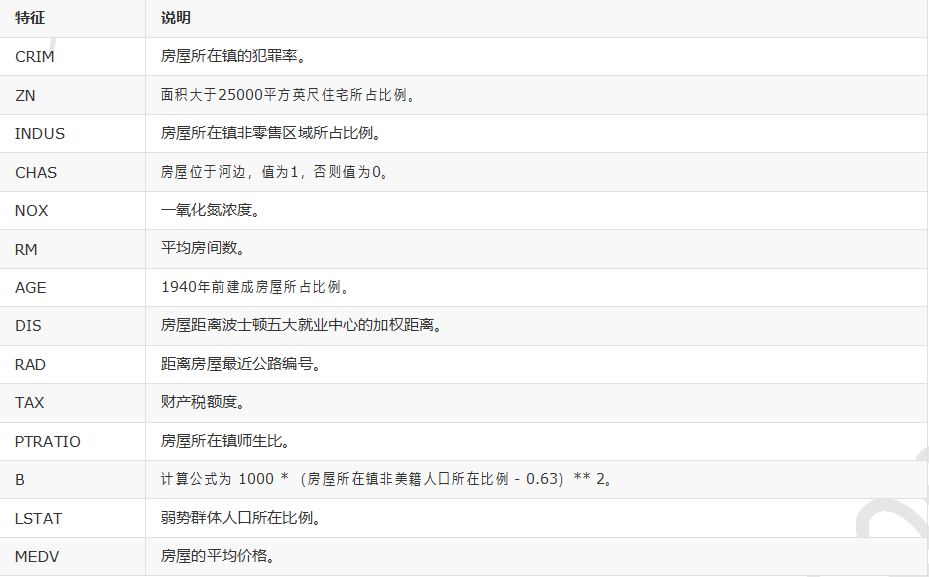

In [5]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_boston
import pandas as pd

# 获取波士顿房价数据集
boston = load_boston()
X,y = boston.data,boston.target
# 将特征X与标签y进行连接
df = pd.DataFrame(np.concatenate([X,y.reshape(-1,1)],axis=1),columns=boston.feature_names.tolist()+["MEDV"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
print("模型权重：", lr.coef_)
print("截距：", lr.intercept_)
y_hat = lr.predict(X_test)
print("训练集R^2：", lr.score(X_train, y_train))
print("测试集R^2：", lr.score(X_test, y_test))


模型权重： [-1.18e-01  4.40e-02 -5.77e-03  2.39e+00 -1.56e+01  3.77e+00 -7.04e-03
 -1.43e+00  2.40e-01 -1.13e-02 -9.86e-01  8.44e-03 -4.99e-01]
截距： 36.93325545711977
训练集R^2： 0.7697699488741149
测试集R^2： 0.6354638433202122
